# Project 2: News Bias Analysis

Author: **Serena Chang**

Do not run functions again, unless you would like to see different outputs. These functions have been run already, so the corresponding files have been saved. Analysis portions of this essay are based on findings from the already saved graphs.

## Sentiment Analysis of News Headlines

### Introduction
The News Bias Analysis library serves to perform sentiment analysis on top news headlines from news sources with different political bias ratings. Functions for data processing are in `headlineanalysis.py` and functions for graphing findings are in `plotsentiment.py`. With these functions, I wanted to find trends among polarity scores to see if there were major differences between news sources with different bias ratings.

Finding the sentiment in news headlines and comparing them to bias ratings seemed interesting to me, as fake news and opinion-driven propaganda are such prevalent issues in modern day media. 

As the election day was coming up when I started this project, I analyzed headlines pertaining to the keywords 'biden', 'trump', and 'election'. Additionally, I only used political news sources in my queries.

This project mainly uses visuals to demonstrate differences in sentiment polarity scores. However, more analysis can be done using the processed data.

### Methodology
I queried top headlines based on keyword from NewsAPI. I stored my data in JSON files, then processed the JSON files and saved them as CSV files. After sentiment analysis is conducted, the analyzed data is saved in a new CSV file. This allows users to track the progress of data processing. From this analysis, I used three types of graphs to illustrate my findings.

In order to structure the data to make heatmaps and barplots, I pivotted and melted tables.

In [3]:
# Import libraries
import headlineanalysis as ha
import plotsentiment as ps
keywords = ['trump', 'biden', 'election']

#### Get CSV Files for Headlines and Perform Sentiment Analysis
Save CSV files with top headlines of keywords, and save separate files after sentiment analysis is performed.

In [11]:
for keyword in keywords:
    ha.get_all_headlines(keyword)
    ha.use_sentiment_analysis(f'csv_files/{keyword}.csv')

Make lists of CSV file names, to make referencing files later easier.

In [4]:
csv_name = lambda x: f'csv_files/{x}.csv'
list_csv_names = [csv_name(x) for x in keywords]

sa_csv_name = lambda x: f'sentiment_csv_files/{x}.csv'
list_sentiment_csvs = [sa_csv_name(x) for x in keywords]

#### Plotting Positive and Negative Polarity Scores by Bias Rating

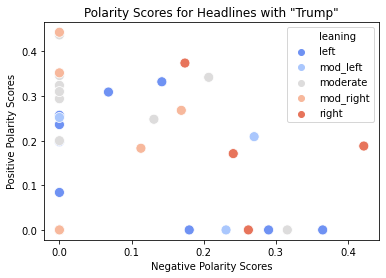

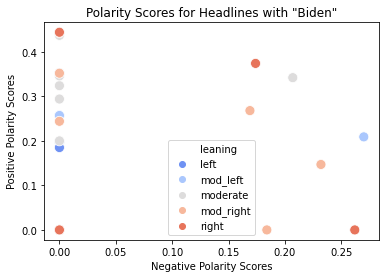

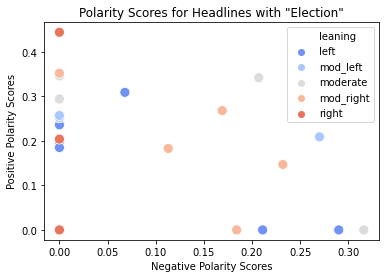

In [5]:
for csv in list_sentiment_csvs:
    ps.plot_scatter_posneg(csv)

#### Plotting Mean Polarity Scores of Keywords

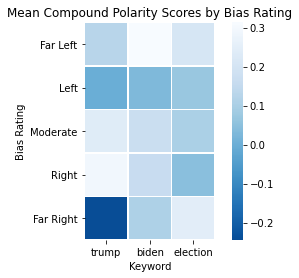

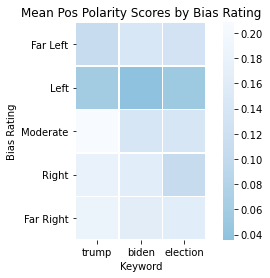

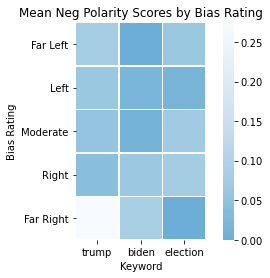

In [8]:
scores = ['compound', 'pos', 'neg']
for score in scores:
    ps.plot_heatmap(list_sentiment_csvs, score)

#### Plotting Polarity Scores by News Source

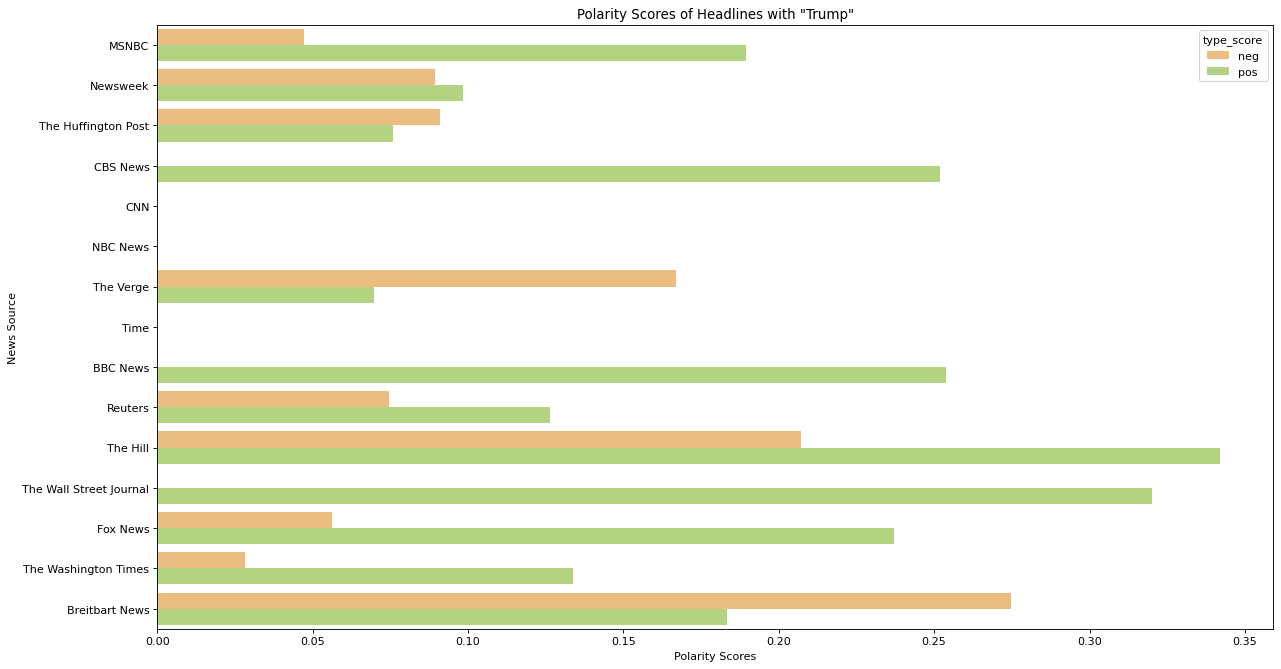

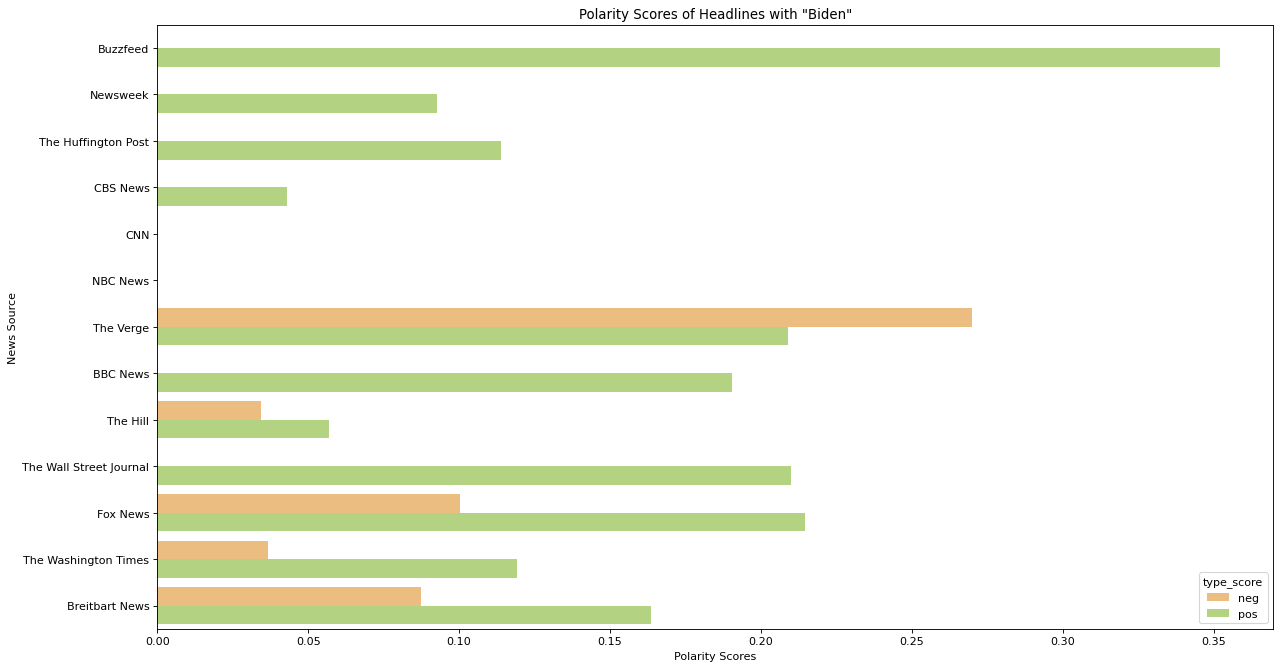

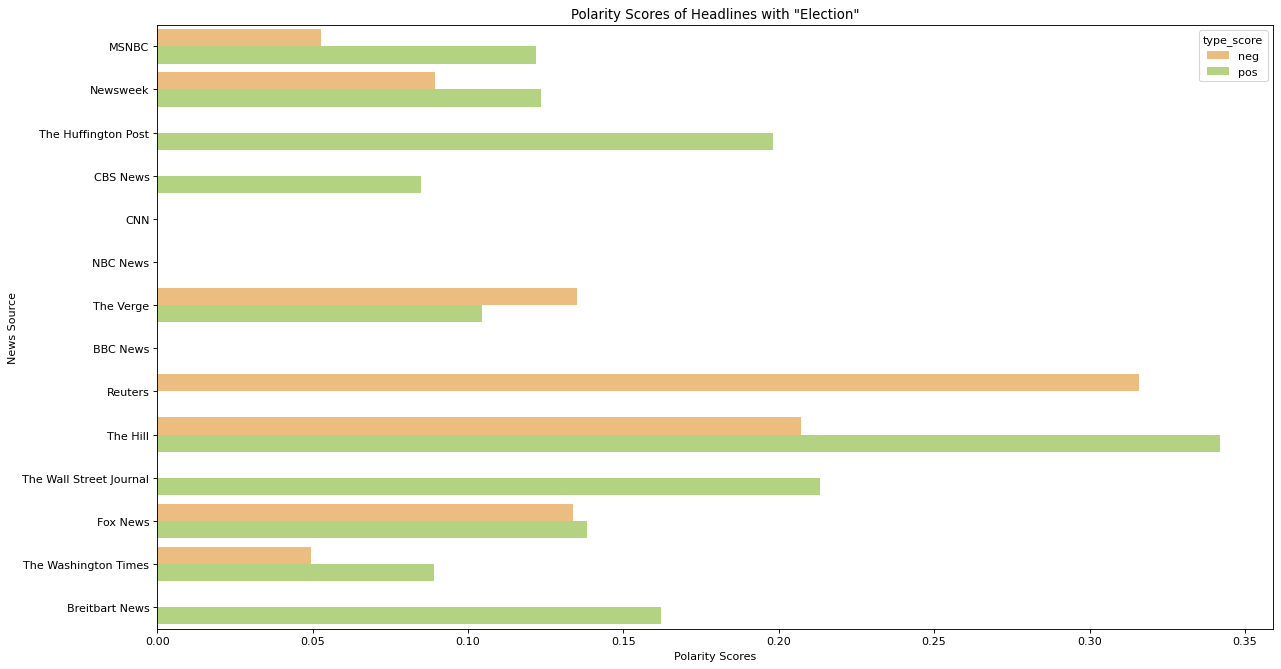

In [6]:
for csv in list_sentiment_csvs:
    ps.barplot_polarity(csv, ['neg', 'pos'])

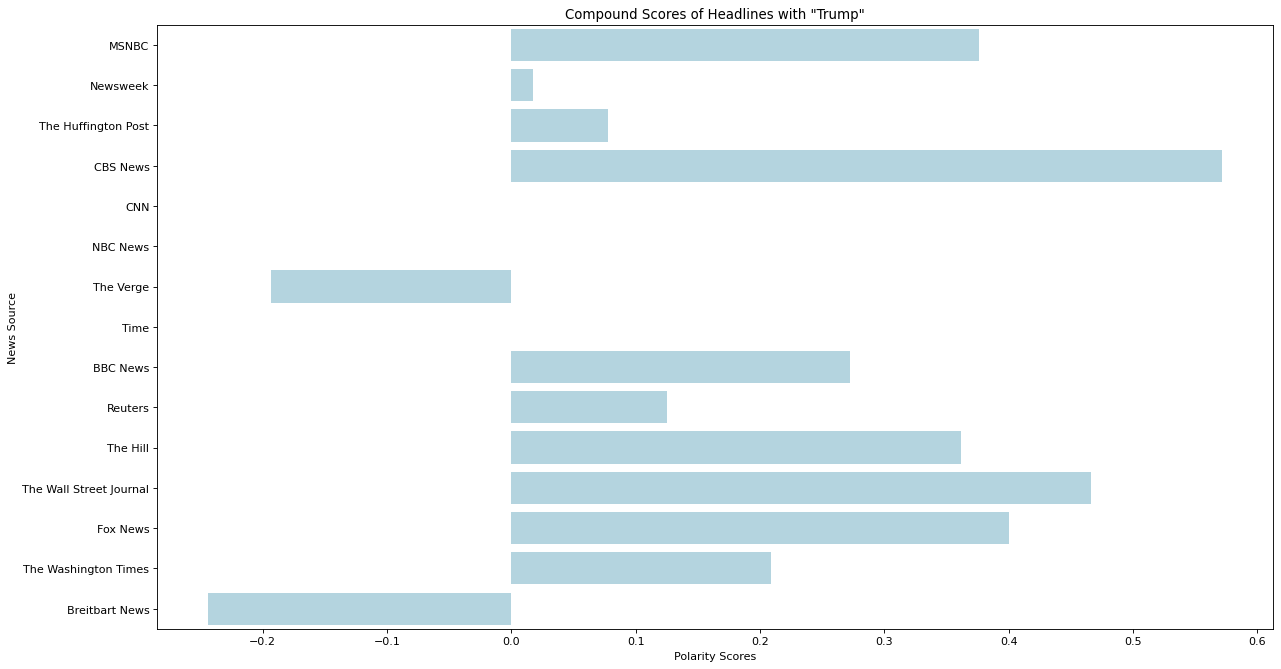

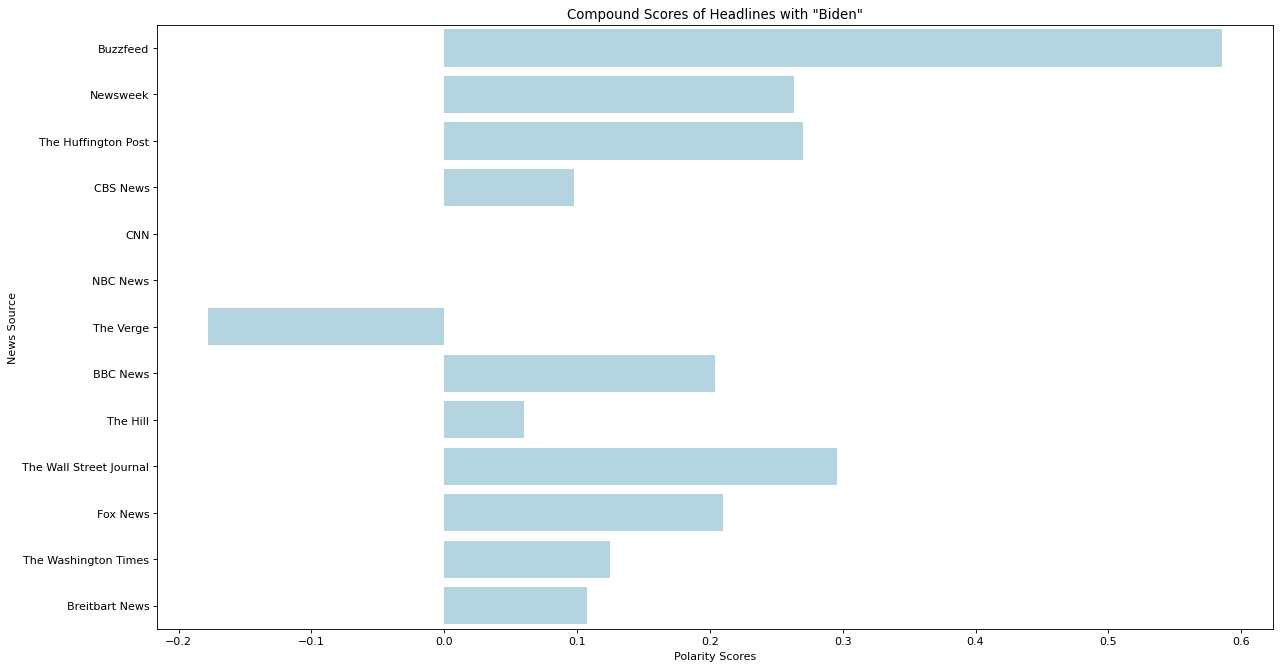

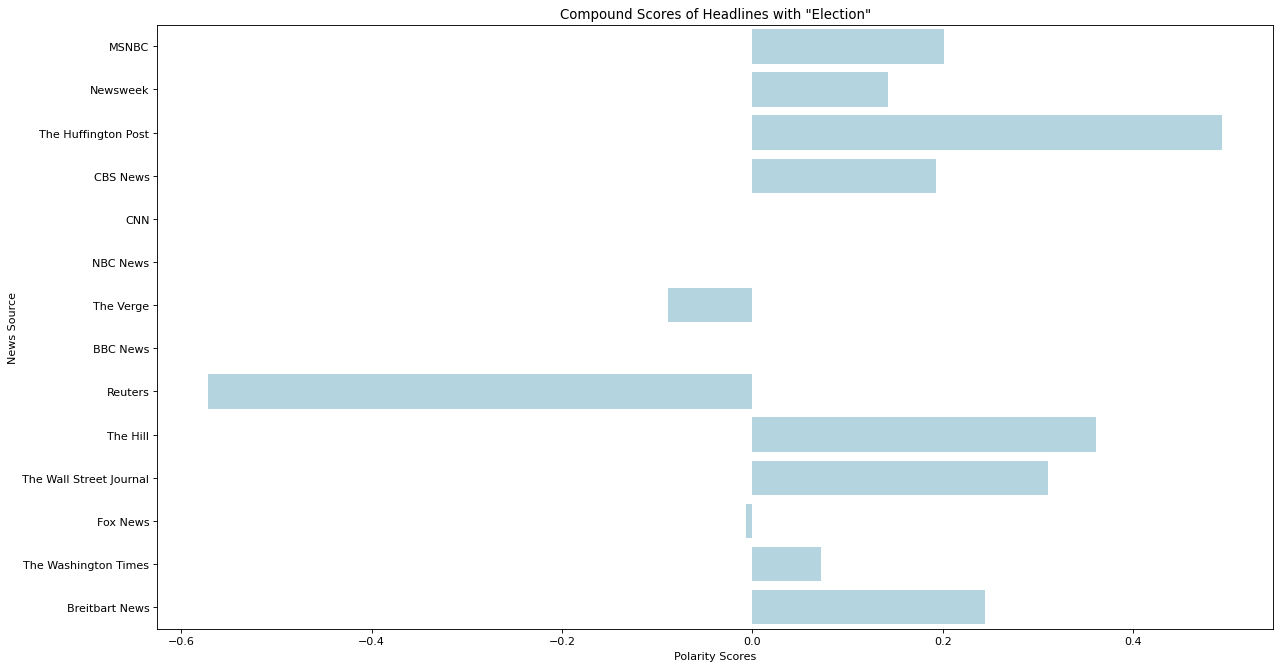

In [7]:
for csv in list_sentiment_csvs:
    ps.barplot_polarity(csv, ['compound'])

### Results
I made scatterplots, heatmaps, and barplots to demonstrate differences in polarity scores depending on news source and bias rating. I used the scatterplot to see if there were any noticeable clusters on the graph, and there were not. I used the heatmaps to see the mean polarity scores based on bias rating. This visual is very effective in showing obvious outliers across data. Lastly, I used barplots to graph polarity scores directly next to each other by news source. The news sources are also sorted up to down in order of left to right bias ratings. I sorted the sources so it would be easier to see trends in scores.

#### Analysis of Findings
From the positive and negative polarity score scatterplots, there are no discernible clusters.

From the heatmap, something that I found interesting is that far right news sources had very high compound scores for headlines with 'trump' before the election results came out. After the results came out, the mean compound scores are very low. Additionally, what is not unexpected is that far left news sources have a high mean compound score for headlines with 'biden'.

From the compound score barplot, it is very interesting that moderate news sources like Reuters and The Verge tend to have the lowest compound scores, compared to other bias ratings.

### Results
The findings from this data are not very surprising in that left news sources tend to have more positive sentiments while talking about the 2020 Democratic Presidential Candidate (Biden), and right news sources tend to have more positive sentiments while talking about the Republican candidate (Trump). What was the most surprising to me was seeing the high negative polarity scores from the moderate sources. I would have expected them to be the closest to 0 for all scores.

#### Limitations and Future Extensions
While these findings are interesting to look at, there are no solid findings that can be taken from these analyses. This is because while polarity scores from the NLTK library can identify sentiments, there is no way to balance the score based on how the sentiment relates to the queried keyword. Additionally, the data is not categorized by what event the articles are talking about, which takes meaning from sentiment comparison.

In the future, to obtain analyses with directly comparable sentiments, it would be good to also analyze the full articles and categorize the data by the events they are talking about. This would mean I would have to either use a separate API or web scrape to find the full articles. NewsAPI does not provide the full articles in its JSON string output.

#### Insights/Takeaways
I did my project about news sources and bias ratings, because fake news and propaganda-adjacent 'news' is sadly prevalent to our society. With the findings from this project, I want to continue to check my sources, facts, and rhetoric in news. I want to encourage others to do the same. As seen from the differences in sentiment scores across bias ratings, there are differences in rhetoric and tone in different articles. It is always important to be wary of this, and be ready to check the validity of sources.

#### Reflection
Throughout this project, I learned new libraries, like Seaborn and Datatest. I also learned how to pivot and unpivot tables in Pandas, process JSON strings, and write unit tests for CSV files. In terms of growth in hard-coding, I learned how to use lambda functions to make lists and how to use the `eval()` function. 

I would say the most challenging part of the project after deciding on an idea, was organizing how I wanted to present my data and findings. At first, I struggled to decide on the visuals I wanted to use. After exploring my data more and seeing the Matplotlib and Seaborn libraries, there was definitely a learning curve to pivotting and melting tables.

If I had more time, I would extend my data collection to getting the articles of the top headlines from the web. This would probably entail web scraping, or using another API. I would perform sentiment analysis on the full articles instead of just the headlines.